STUDENT ENROLLMENT PREDICTION









Data Exploration

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/sample_data/dataset.csv'
df = pd.read_csv(file_path)

# Display the initial structure of the DataFrame
print(df.head(10))

# Show information about the DataFrame
print("")
print("df.info():")
print(df.info())

print("")
print("df.shape():")
print(df.shape)

print("")
print("Describtion summary of the dataset:")
print(df.describe())

print("")
print("Values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

print("")
print("Display Duplicate Data: (if have)")
print(df[df.duplicated()])

   Student ID ENROLLMENT MONTH  ENROLLMENT YEAR       PRE-U      COURSES  \
0        1521          January             2013  Foundation    Computing   
1        2533          January             2005     Diploma  Engineering   
2        3278          January             2010     Diploma  Engineering   
3        4705          January             2000     Diploma     Business   
4        5331          January             2000     Diploma     Business   
5        6436          January             2011  Foundation  Engineering   
6        7281          January             2021     Diploma     Business   
7        8718        September             2002     Diploma  Engineering   
8        9583        September             2004     Diploma    Computing   
9       10666        September             2018  Foundation    Computing   

  TYPE OF SPONSOR  YTN PBU    NATIONALITY  CGPA EXCEED  DROPOUT  \
0             Loan     Yes  International  2.48     No        0   
1        Sponsored     NaN   

### Data Cleaning

In [ ]:
file_path = '/content/sample_data/dataset.csv'
df = pd.read_csv(file_path)


#To drop duplicate rows, you can set keep tu False and use the result of the duplicated() function as the indexinto the dataframe
# remove duplicates and keep the first
df.drop_duplicates(keep='first', inplace=True)

#Once the rows containing the NaN value the index is no longer in sequential order. reset the index using reset_index() function
df = df.reset_index(drop=True)	# reset the index

#print cleaned dataframe
print(df)


# Display the final structure of the DataFrame after cleaning
print("\nCleaned DataFrame:")
print(df.head())

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/content/sample_data/postProcessing_Dataset.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to: {cleaned_file_path}")


      Student ID ENROLLMENT MONTH  ENROLLMENT YEAR       PRE-U      COURSES  \
0           1521          January             2013  Foundation    Computing   
1           2533          January             2005     Diploma  Engineering   
2           3278          January             2010     Diploma  Engineering   
3           4705          January             2000     Diploma     Business   
4           5331          January             2000     Diploma     Business   
...          ...              ...              ...         ...          ...   
1995     1996791          January             2013  Foundation    Computing   
1996     1997177          January             2021  Foundation     Business   
1997     1998844          January             2022     Diploma    Computing   
1998     1999322          January             2005  Foundation    Computing   
1999     2000705        September             2006  Foundation    Computing   

     TYPE OF SPONSOR  YTN PBU    NATIONALITY  CGPA 

### Feature Engineering

In [ ]:
file_path = '/content/sample_data/dataset.csv'
df = pd.read_csv(file_path)

#An instance of the LabelEncoder class is created. This instance will be used to perform the label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# The fit_transform method of the LabelEncoder is applied to the specified column (df[column]) in the DataFrame. The fit_transform method performs two steps:
df[column] = label_encoder.fit_transform(df[column])

### Data Visualization

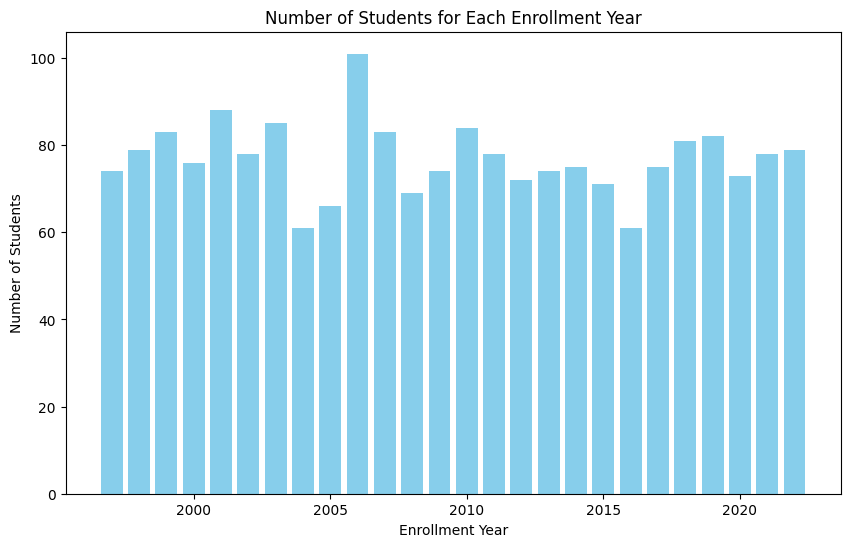

Text(0, 0.5, 'UNITEN INTAKE')

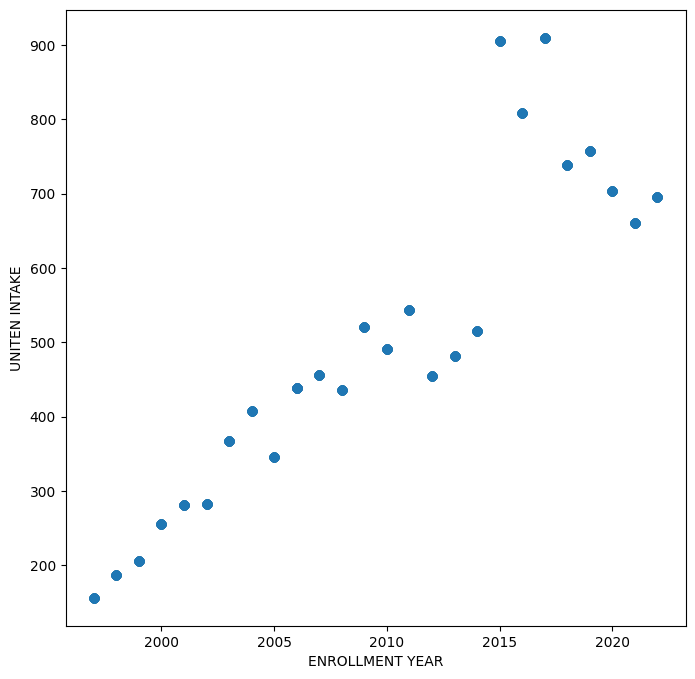

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the cleaned DataFrame
file_path = '/content/sample_data/postProcessing_Dataset.csv'
df = pd.read_csv(file_path)



# Calculating number of enrollment based on dataframe
enrollment_total = df['ENROLLMENT YEAR'].value_counts().sort_index()

# Create a DataFrame from the enrollment_total series
enrollment_df = pd.DataFrame({'Year': enrollment_total.index, 'Number of Students': enrollment_total.values})

# Create a bar chart using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(enrollment_df['Year'], enrollment_df['Number of Students'], color='skyblue')
plt.title('Number of Students for Each Enrollment Year')
plt.xlabel('Enrollment Year')
plt.ylabel('Number of Students')
plt.show()


#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

#this will plot a  graph that will looks like linear regression
%matplotlib inline
plt.scatter(df['ENROLLMENT YEAR'], df['UNITEN INTAKE'], marker='o')
plt.xlabel('ENROLLMENT YEAR')
plt.ylabel('UNITEN INTAKE')

<ipython-input-183-f7d43057cd59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-183-f7d43057cd59>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().abs().nlargest(5, 'UNITEN INTAKE').index)
<ipython-input-183-f7d43057cd59>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


                     Student ID  ENROLLMENT YEAR      CGPA   DROPOUT  \
Student ID             1.000000         0.023275  0.000884 -0.011760   
ENROLLMENT YEAR        0.023275         1.000000  0.037946 -0.014538   
CGPA                   0.000884         0.037946  1.000000 -0.600184   
DROPOUT               -0.011760        -0.014538 -0.600184  1.000000   
UNEMPLOYMENT RATE      0.005561         0.389831 -0.000199 -0.010023   
GDP (B)                0.023303         0.971635  0.038392 -0.009845   
GDP GROWTH RATE (%)    0.013729         0.203288  0.052055 -0.040649   
INFLATION RATE        -0.006813        -0.219296  0.012497  0.009573   
IPTS ENROLLMENT        0.020748         0.884001  0.030142 -0.013083   
UNITEN INTAKE          0.022883         0.905796  0.034024 -0.014132   

                     UNEMPLOYMENT RATE   GDP (B)  GDP GROWTH RATE (%)  \
Student ID                    0.005561  0.023303             0.013729   
ENROLLMENT YEAR               0.389831  0.971635             

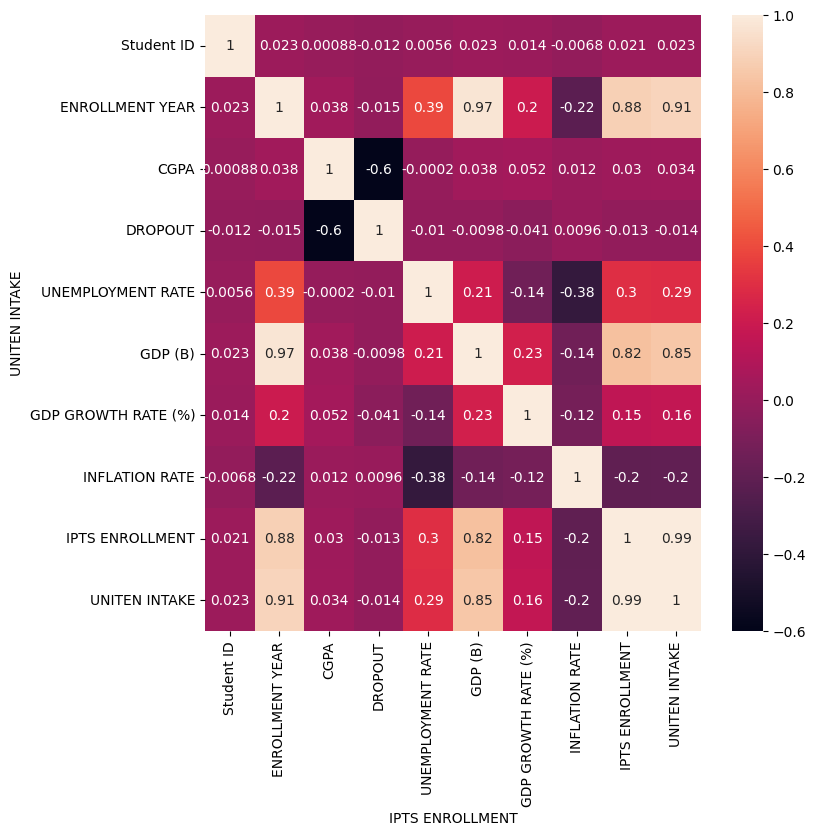

In [ ]:
#print the correlation in data frame
corr = df.corr()
print(corr)
print("") #set space
#this code will show 5 features that influence the target the most
print(df.corr().abs().nlargest(5, 'UNITEN INTAKE').index)

#visualize the correlation in heatmap
sns.heatmap(df.corr(),annot=True)
%matplotlib inline
plt.scatter(df['IPTS ENROLLMENT'], df['UNITEN INTAKE'], marker='o')
plt.xlabel('IPTS ENROLLMENT')
plt.ylabel('UNITEN INTAKE')

#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

### Model Evaluation




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Call new data frame after cleanning and preprocessing
file_path = '/content/sample_data/postProcessing_Dataset.csv'
df = pd.read_csv(file_path)

# Prepare the features and target variable
X = df[['UNEMPLOYMENT RATE', 'GDP (B)', 'GDP GROWTH RATE (%)', 'INFLATION RATE', 'ENROLLMENT YEAR', 'IPTS ENROLLMENT']]
y = df['UNITEN INTAKE']  # Use 'STUDENT ID' as the target variable for predicting the number of student intakes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models
linear_model = LinearRegression()
svm_model = make_pipeline(StandardScaler(), SVR())
random_forest_model = RandomForestRegressor(random_state=42)


# Train models
#The model learns the relationships between the features and the target variable during this training process.
linear_model.fit(X_train, y_train)
#SVM aims to find the hyperplane that best separates the data points according to their class labels.
svm_model.fit(X_train, y_train)
#Random Forest is an ensemble learning algorithm that builds a collection of decision trees and combines their predictions to improve overall performance.
random_forest_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)


r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print('Linear Regression Model R-squared Score: %.4f' % r2_linear)
print('Linear Regression Model Root Mean Squared Error Score: %.4f' % rmse_linear)
print('=========================================================================')

# Evaluate Support Vector Machine (SVM) model
#this code display the value of R-squared before trainning the model
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print('Support Vector Machine (SVM) Model R-Squared Score: %.4f' % (r2_svm))
print('Support Vector Machine (SVM) Model Mean Squared Error Score: %.4f' % (mse_svm))
print('=========================================================================')

#this code display the value of Mean Squared Error before trainning the model
r2_random_forest = r2_score(y_test, y_pred_random_forest)
mse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))
print('Random Forest Regressor Model R-squared Score: %.4f' % (r2_random_forest))
print('Random Forest Regressor Model Root Mean Squared Error Score: %.4f' % (mse_random_forest))
print('=========================================================================')



Linear Regression Model R-squared Score: 0.9925
Linear Regression Model Root Mean Squared Error Score: 18.0369
Support Vector Machine (SVM) Model R-Squared Score: 0.7752
Support Vector Machine (SVM) Model Mean Squared Error Score: 98.9430
Random Forest Regressor Model R-squared Score: 1.0000
Random Forest Regressor Model Root Mean Squared Error Score: 0.0000


### Training Model

In [ ]:
# Import used python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from sklearn.model_selection import GridSearchCV


# Avoid warnings alert
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


file_path = '/content/sample_data/postProcessing_Dataset.csv'
df = pd.read_csv(file_path)

# Prepare the features and target variable
X = df[['UNEMPLOYMENT RATE', 'GDP (B)', 'GDP GROWTH RATE (%)', 'INFLATION RATE', 'IPTS ENROLLMENT']]
y = df['UNITEN INTAKE']

# Split the data into training and testing sets with 205 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    # Add other relevant parameters to tune
}

grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
# Create and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create and train Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Create and train Random Forest Regressor model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Create and train Support Vector Machine (SVM) model
svm_model = make_pipeline(StandardScaler(), SVR())
svm_model.fit(X_train, y_train)

# Predict total student intake for the input using each model
linear_prediction = int(linear_model.predict(X_test)[0])
random_forest_prediction = int(random_forest_model.predict(X_test)[0])
svm_prediction = int(svm_model.predict(X_test)[0])

#save the prediction to be user define funtion
linear_test_predictions = linear_model.predict(X_test)
random_forest_test_predictions = best_random_forest_model.predict(X_test)
svm_test_predictions = svm_model.predict(X_test)

# load the value of mse score into variable for evaluation
linear_mse = mean_squared_error(y_test, linear_test_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_test_predictions)
svm_mse = mean_squared_error(y_test, svm_test_predictions)

# load the value of r^2 and mse score into variable for evaluation
linear_r2 = r2_score(y_test, linear_test_predictions)
random_forest_r2 = r2_score(y_test, random_forest_test_predictions)
svm_r2 = r2_score(y_test, svm_test_predictions)

# Print evaluation of all models
#this code display the value of Mean Squared Error before trainning the model

print("\nModel Evaluation on Test Set:")
print('Linear Regression R-Squared Score: %.4f' % (linear_r2))
print('Random Forest Regressor R-Squared Score: %.4f' % (random_forest_r2))
print('SVM Regressor R-Squared Score: %.4f' % (svm_r2))

#this code display the value of Mean Squared Error after trainning the model

print("==========================================================================")
print('\nLinear Regression MSE: %.4f' % mean_squared_error(y_test, linear_test_predictions))
print('Random Forest Regressor Mean Squared Error: %.4f' % mean_squared_error(y_test, random_forest_test_predictions))
print('SVM Regressor Mean Squared Error: %.4f' % mean_squared_error(y_test, svm_test_predictions))



Model Evaluation on Test Set:
Linear Regression R-Squared Score: 0.9922
Random Forest Regressor R-Squared Score: 0.9891
SVM Regressor R-Squared Score: 0.7601

Linear Regression MSE: 340.4783
Random Forest Regressor Mean Squared Error: 474.4850
SVM Regressor Mean Squared Error: 10446.2345


### Validate Result

Text(0.5, 1.0, 'Actual Intake vs Predicted Intake')

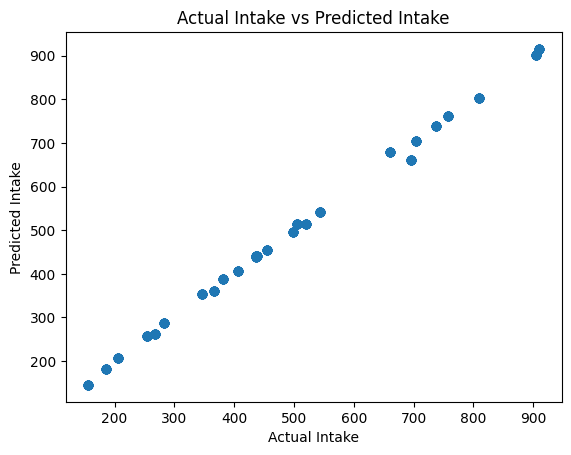

In [ ]:
# plot a scatter plot chart showing the the actual result vs prediction result
#this chart will show the relation and difference between acttual values and predicstion values

plt.scatter(y_test, linear_test_predictions)
plt.xlabel("Actual Intake")
plt.ylabel("Predicted Intake")
plt.title("Actual Intake vs Predicted Intake")

### Prediction Model

In [ ]:
# Import necessary libraries
import pandas as pd


# Load the historical data
file_path = '/content/sample_data/postProcessing_Dataset.csv'
df = pd.read_csv(file_path)

# set the x (features) and y(target) name for prediction
X = df[['UNEMPLOYMENT RATE', 'GDP (B)', 'GDP GROWTH RATE (%)', 'INFLATION RATE','IPTS ENROLLMENT','ENROLLMENT YEAR']]
y = df['UNITEN INTAKE']

# Use a linear regression model
#decision made after models evaluation result shows linear regression r^2 is the most closest to 1
model = LinearRegression()
model.fit(X, y)



LinearRegression()

### USER INTERFACE

In [ ]:
#code to save user input in variable
# Get user input according to the features indicators
input_unemployment_rate = float(input("Please enter the current unemployment rate: "))
input_gdp = float(input("Please enter the current GDP (in billion): "))
input_gdp_growth_rate = float(input("Please enter the current GDP growth rate (in percentage): "))
input_inflation_rate = float(input("Please enter the current inflation rate: "))
input_ipts_enrollment = float(input("Please enter the IPTS enrollment total: "))
predicted_year = int(input("Please enter year you want to predict: "))

# Predict future total student intake for the year 2025
input_data = [[input_unemployment_rate, input_gdp, input_gdp_growth_rate, input_inflation_rate, input_ipts_enrollment, predicted_year]]
predict_intake = int(model.predict(input_data)[0])

#display the prediction result
print(f"\nTotal UNITEN enrollment student for that year is: {predict_intake}")

Please enter the current unemployment rate: 4.5
Please enter the current GDP (in billion): 459
Please enter the current GDP growth rate (in percentage): 2.3
Please enter the current inflation rate: 1.2
Please enter the IPTS enrollment total: 2025
Please enter year you want to predict: 2027

Total UNITEN enrollment student for that year is: 154
